In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
dados = pd.read_csv("online_store_customer_data.csv")
dados

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


In [4]:
numericas = dados[["Age","Amount_spent"]]
numericas.describe()

,Age,Amount_spent
count,2470.000000,2270.000000
mean,46.637652,1418.422577
std,18.186277,878.507451
min,15.000000,2.090000
25%,32.000000,678.192500
50%,47.000000,1341.435000
75%,62.000000,2038.102500
max,78.000000,2999.980000


<Axes: xlabel='Age'>

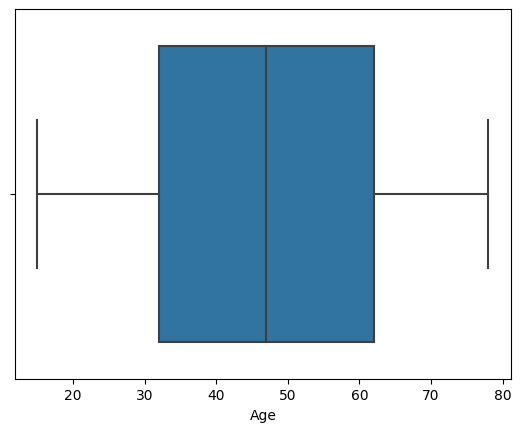

In [5]:
sns.boxplot(x=numericas["Age"])

<Axes: xlabel='Amount_spent'>

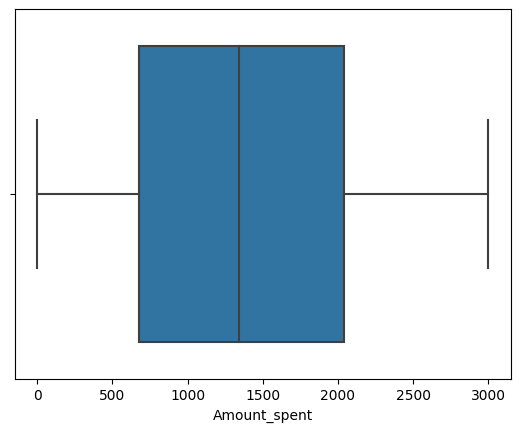

In [6]:
sns.boxplot(x=numericas["Amount_spent"])

In [7]:
(dados['Gender'].value_counts() / dados.shape[0]) * 100

Female    53.980892
Male      44.904459
Name: Gender, dtype: float64

In [8]:
(dados['Marital_status'].value_counts() / dados.shape[0]) * 100

Married    58.638535
Single     41.361465
Name: Marital_status, dtype: float64

In [9]:
(dados['Segment'].value_counts() / dados.shape[0]) * 100

Basic       45.222930
Silver      19.506369
Platinum    17.635350
Gold         9.832803
Missing      7.802548
Name: Segment, dtype: float64

In [10]:
my_crosstab = pd.crosstab(index=dados["Segment"], 
                            columns=dados["Gender"],
                             margins=True) 

In [11]:
my_crosstab = pd.crosstab(index=dados["Segment"], 
                            columns=dados["Gender"],
                             margins=True) 

In [12]:
my_crosstab


Gender,Female,Male,All
Segment,,,
Basic,616,507,1123
Gold,138,106,244
Missing,95,99,194
Platinum,236,202,438
Silver,271,214,485
All,1356,1128,2484


In [13]:
(dados['State_names'].value_counts() / dados.shape[0]) * 100

Illinois          2.667197
Georgia           2.547771
Massachusetts     2.507962
Maine             2.468153
Kentucky          2.348726
Minnesota         2.348726
Missouri          2.269108
Arizona           2.229299
Delaware          2.229299
Arkansas          2.189490
Nevada            2.189490
New York          2.189490
California        2.189490
New Mexico        2.189490
Vermont           2.149682
West Virginia     2.149682
New Jersey        2.109873
Oregon            2.109873
Florida           2.109873
Connecticut       2.070064
Washington        2.070064
Pennsylvania      2.070064
Colorado          2.070064
South Dakota      2.070064
Michigan          2.070064
Iowa              2.030255
Rhode Island      2.030255
Louisiana         1.950637
Texas             1.950637
Montana           1.910828
North Carolina    1.831210
Virginia          1.831210
Hawaii            1.831210
Wisconsin         1.791401
Idaho             1.791401
Maryland          1.791401
South Carolina    1.791401
W

In [14]:
(dados['Employees_status'].value_counts() / dados.shape[0]) * 100

Employees        37.659236
workers          31.767516
self-employed    19.386943
Unemployment     10.151274
Name: Employees_status, dtype: float64

In [16]:
(dados['Payment_method'].value_counts() / dados.shape[0]) * 100

PayPal    46.496815
Card      29.816879
Other     23.686306
Name: Payment_method, dtype: float64

In [17]:
(dados['Referal'].value_counts() / dados.shape[0]) * 100

1.0    61.186306
0.0    32.643312
Name: Referal, dtype: float64

In [18]:
(dados['Amount_spent'].value_counts() / dados.shape[0]) * 100

1264.73    0.079618
61.35      0.079618
1277.64    0.079618
1397.09    0.079618
1938.48    0.079618
             ...   
2876.36    0.039809
2557.92    0.039809
1494.24    0.039809
1094.78    0.039809
1073.15    0.039809
Name: Amount_spent, Length: 2250, dtype: float64

In [19]:
my_crosstab = pd.crosstab(index=dados["Segment"], 
                            columns=dados["State_names"],
                             margins=True) 

In [20]:
my_crosstab

State_names,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,All
Segment,,,,,,,,,,,,,,,,,,,,,
Basic,15,22,31,19,25,21,17,29,24,29,...,13,19,22,29,22,17,26,22,25,1136
Gold,3,3,4,10,3,7,10,4,7,3,...,1,8,6,4,3,4,8,3,3,247
Missing,2,2,4,3,6,6,4,3,6,6,...,4,9,2,0,2,9,6,2,0,196
Platinum,11,7,10,10,6,10,11,7,7,17,...,11,7,4,10,11,11,8,9,5,443
Silver,11,7,7,13,15,8,10,13,9,9,...,10,6,9,11,8,11,6,9,11,490
All,42,41,56,55,55,52,52,56,53,64,...,39,49,43,54,46,52,54,45,44,2512


In [21]:
my_crosstab = pd.crosstab(index=dados["Segment"], 
                            columns=dados["Employees_status"],
                             margins=True) 

In [22]:
my_crosstab

Employees_status,Employees,Unemployment,self-employed,workers,All
Segment,,,,,
Basic,428,117,227,349,1121
Gold,99,21,46,77,243
Missing,77,16,40,62,195
Platinum,148,52,86,154,440
Silver,194,49,88,156,487
All,946,255,487,798,2486


In [23]:
my_crosstab = pd.crosstab(index=dados["Segment"], 
                            columns=dados["Payment_method"],
                             margins=True) 

In [24]:
my_crosstab

Payment_method,Card,Other,PayPal,All
Segment,,,,
Basic,336,276,524,1136
Gold,75,61,111,247
Missing,63,42,91,196
Platinum,136,105,202,443
Silver,139,111,240,490
All,749,595,1168,2512


In [25]:
my_crosstab = pd.crosstab(index=dados["Segment"], 
                            columns=dados["Referal"],
                             margins=True) 

In [26]:
my_crosstab

Referal,0.0,1.0,All
Segment,,,
Basic,382,688,1070
Gold,71,164,235
Missing,68,116,184
Platinum,139,269,408
Silver,160,300,460
All,820,1537,2357


In [27]:
my_crosstab = pd.crosstab(index=dados["Segment"], 
                            columns=dados["Amount_spent"],
                             margins=True) 

In [28]:
my_crosstab

Amount_spent,2.09,2.16,2.84,5.31,5.55,6.79,7.44,8.67,8.79,14.42,...,2987.96,2988.13,2989.33,2995.73,2996.82,2997.15,2997.21,2998.62,2999.98,All
Segment,,,,,,,,,,,,,,,,,,,,,
Basic,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1040
Gold,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,220
Missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,183
Platinum,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,394
Silver,0,0,1,0,1,0,1,1,1,0,...,1,0,0,0,0,0,1,0,0,433
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2270
